In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='__removido__', project_access_token='__removido__')
pc = project.project_context

# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [2]:
!pip install scikit-learn --upgrade
!pip install xgboost --upgrade
!pip install imblearn --upgrade
!pip install pandas --upgrade
!pip install matplotlib --upgrade
!pip install numpy --upgrade
!pip install seaborn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)
Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)
Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)
Requirement already up-to-date: pandas in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.1.1)
Requirement already up-to-date: matplotlib in /opt/conda/envs/Python36/lib/python3.6/site-packages (3.3.1)
Requirement already up-to-date: numpy in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.19.1)
Requirement already up-to-date: seaborn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.10.1)


<hr>

## Download dos conjuntos de dados em formato .csv

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv -O training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-05 02:48:18--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1736600 (1.7M) [text/plain]
Saving to: ‘training_dataset.csv’

100%[======================================>] 1,736,600   --.-K/s   in 0.05s   

2020-09-05 02:48:18 (32.2 MB/s) - ‘training_dataset.csv’ saved [1736600/1736600]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [5]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

In [6]:
cat_cols = ['graduacao', 'universidade', 'profissao', 'organizacao',
            'pretende_fazer_cursos_lit', 'interesse_mba_lit',
            'importante_ter_certificado', 'como_conheceu_lit', 'categoria']
for col in cat_cols:
    df_training_dataset[col] = df_training_dataset[col].astype('category')
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          13945 non-null  float64 
 1   graduacao                   13950 non-null  category
 2   universidade                13920 non-null  category
 3   profissao                   13977 non-null  category
 4   organizacao                 13961 non-null  category
 5   pretende_fazer_cursos_lit   13989 non-null  category
 6   interesse_mba_lit           14003 non-null  category
 7   importante_ter_certificado  13918 non-null  category
 8   horas_semanais_estudo       13959 non-null  float64 
 9   como_conheceu_lit           13915 non-null  category
 10  total_modulos               13987 non-null  float64 
 11  modulos_iniciados           14044 non-null  float64 
 12  modulos_finalizados         13924 non-null  float64 
 13  certificados    

In [7]:
df_training_dataset.describe(include=np.number).round(1)

,id,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados
count,13945.0,13959.0,13987.0,14044.0,13924.0,13979.0
mean,554477527.4,6.0,78.6,37.2,30.7,0.4
std,260285908.1,2.6,106.5,59.3,52.0,1.2
min,100033956.0,2.0,1.0,1.0,1.0,0.0
25%,328313992.0,4.0,27.0,7.0,4.0,0.0
50%,557649243.0,6.0,40.0,18.0,13.0,0.0
75%,780529482.0,8.0,96.0,43.0,35.0,0.0
max,999989437.0,10.0,2073.0,1370.0,1359.0,32.0


In [8]:
df_training_dataset.describe(include='category')

,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,como_conheceu_lit,categoria
count,13950,13920,13977,13961,13989.0,14003.0,13918.0,13915,15857
unique,6,21,12,11,2.0,2.0,1.0,9,6
top,Licenciatura,INSPER INSTITUTO DE ENSINO E PESQUISA,Diretor,Eletroeletronicos,0.0,0.0,1.0,Outros,perfil6
freq,2398,696,1218,1319,7035.0,7058.0,13918.0,2831,4539


In [9]:
df_training_dataset[df_training_dataset.id.isnull()]

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
8,NaN,Bacharelado,USP,Engenheiro,Eletrodomesticos,NaN,NaN,1.0,3.0,Saint Paul,131.0,38.0,20.0,0.0,perfil3
10,NaN,Tecnólogo,UNIVERSIDADE PRESBITERIANA MACKENZIE,Analista,Eletrodomesticos,1.0,1.0,1.0,3.0,Google,10.0,5.0,1.0,0.0,perfil6
30,NaN,Licenciatura,UNIVERSIDADE NOVE DE JULHO,Coordenador,Eletrodomesticos,0.0,0.0,1.0,NaN,Instagram,98.0,88.0,75.0,0.0,perfil6
31,NaN,Bacharelado,UNIP,Diretor,servicos,0.0,0.0,1.0,8.0,Saint Paul,49.0,5.0,2.0,0.0,perfil6
33,NaN,Tecnólogo,UNIP,Coordenador,Entretenimento,1.0,1.0,1.0,6.0,Instagram,41.0,5.0,3.0,0.0,perfil4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15820,NaN,MBA,Unesp,Coordenador,Laminados,0.0,NaN,1.0,2.0,Linkedin,253.0,96.0,75.0,0.0,perfil2
15822,NaN,Especialização,FACULDADE ANHANGUERA,Analista Senior,Eletrodomesticos,NaN,1.0,NaN,4.0,Facebook,345.0,266.0,259.0,11.0,perfil1
15825,NaN,Licenciatura,FGV-RJ,NaN,NaN,0.0,0.0,1.0,2.0,Outros,98.0,NaN,NaN,0.0,perfil2
15832,NaN,Bacharelado,UFF,Supervisor,e-commerce,0.0,0.0,1.0,3.0,Instagram,31.0,NaN,31.0,0.0,perfil6


In [10]:
target_col = 'categoria'
num_cols = df_training_dataset.select_dtypes(include=[np.number]).drop('id', axis=1).columns
cat_cols = df_training_dataset.select_dtypes(include='category').drop([target_col], axis=1).columns
print('Numerical:\n', num_cols)
print('Categorical:\n', cat_cols)

Numerical:
 Index(['horas_semanais_estudo', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados'],
      dtype='object')
Categorical:
 Index(['graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'como_conheceu_lit'],
      dtype='object')


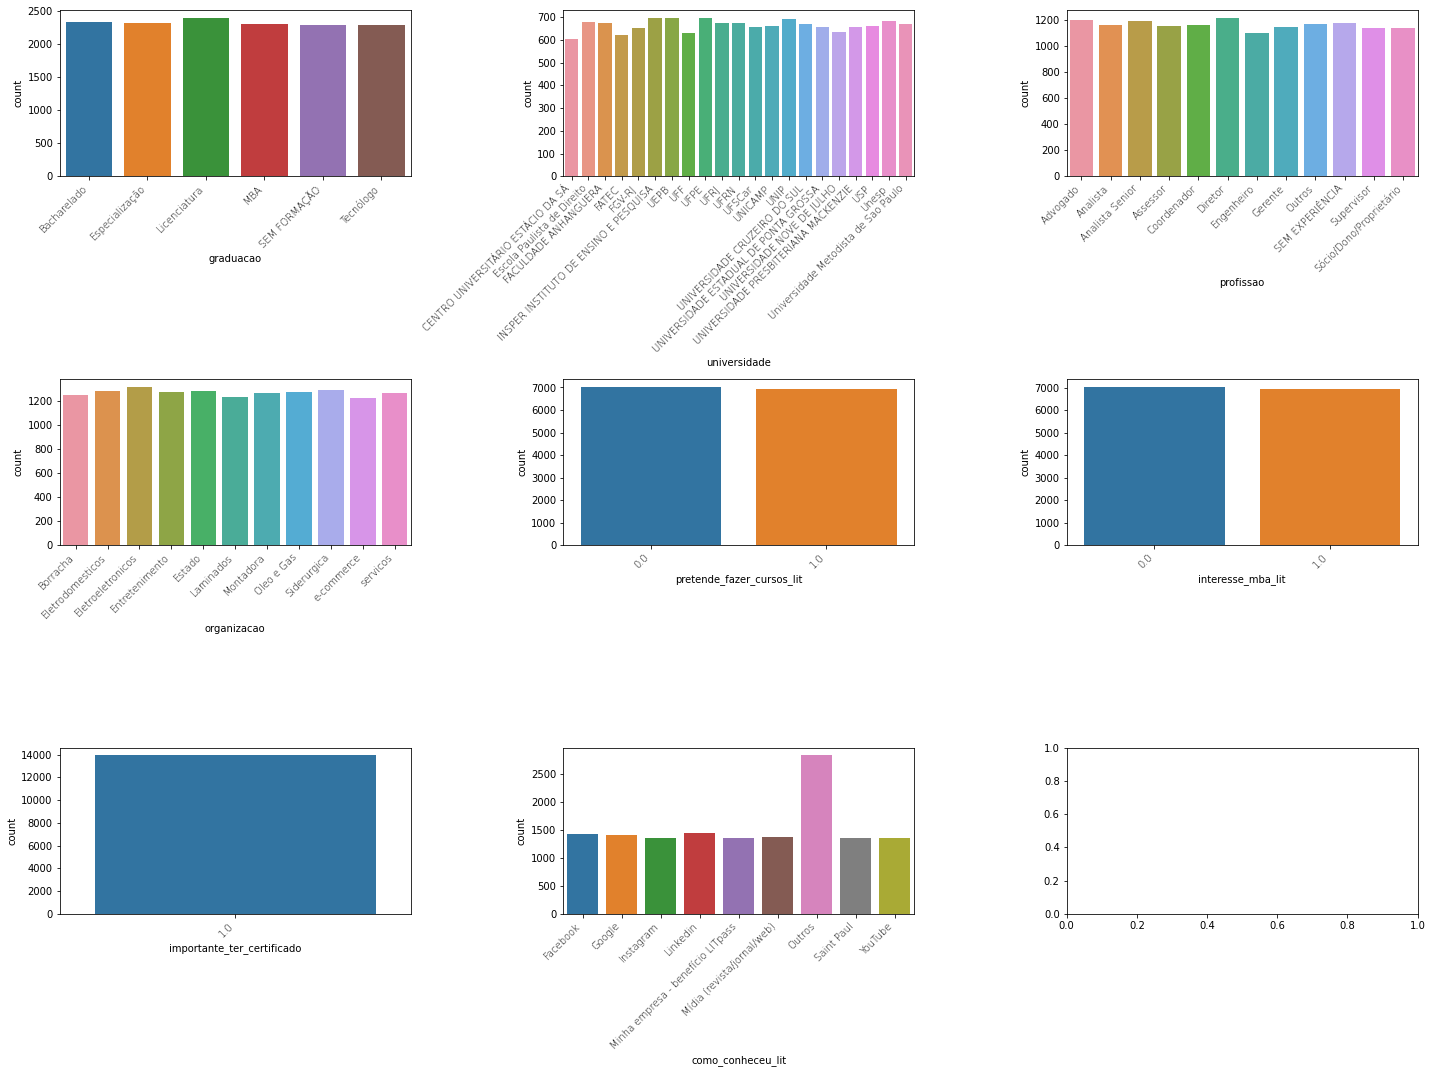

In [11]:
ncols=3
nrows = 1+((len(cat_cols)-1) // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
for i, ax in enumerate(axes.flat):
    if i < len(cat_cols):
        chart = sns.countplot(ax=ax, x=cat_cols[i], data=df_training_dataset)
        chart.set_xticklabels(
            chart.get_xticklabels(), 
            rotation=45, 
            horizontalalignment='right',
            fontweight='light'
        )
        plt.tight_layout()

<hr>

## Detalhamento do desafio: classificação multiclasse

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de uma plataforma de ensino. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``categoria``

<hr>

In [12]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
# from sklearn.feature_selection import RFECV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier

In [13]:
seed=42
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
        ])

pipe = Pipeline([
    ('prep', preprocessor),
    # ('poly', PolynomialFeatures()),
    # ('rfecv', RFECV(estimator=DecisionTreeClassifier(),
    #                 step=1, scoring='accuracy', n_jobs=-1, verbose=1)),
    ('pca', PCA()),
    ('clf', DecisionTreeClassifier(random_state=seed))
])

In [14]:
X = df_training_dataset.drop(target_col, axis=1)
y = df_training_dataset[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)

In [15]:
params = [
    {
    'prep__num__imputer__strategy': ['median', 'mean', 'constant'],
    'prep__num__imputer__fill_value': [0],
    'prep__cat__imputer__strategy': ['constant', 'most_frequent'],
    'prep__cat__imputer__fill_value': ['missing'],
    # 'poly__degree': [1, 2, 3],
    # 'poly__interaction_only': [False, True],
    'pca__n_components': [0.70, 0.80, 0.90],
    'clf': [KNeighborsClassifier()],
    'clf__n_neighbors': [3, 7],
    'clf__weights': ['uniform', 'distance']
    },
    {
    'prep__num__imputer__strategy': ['median', 'mean', 'constant'],
    'prep__num__imputer__fill_value': [0],
    'prep__cat__imputer__strategy': ['constant', 'most_frequent'],
    'prep__cat__imputer__fill_value': ['missing'],
    # 'poly__degree': [1, 2, 3],
    # 'poly__interaction_only': [False, True],
    'pca__n_components': [0.70, 0.80, 0.90],
    'clf':[SVC()],
    'clf__C': [0.1, 10, 1000],
    'clf__gamma': [0.0001, 0.01, 10],
    },
    {
    'prep__num__imputer__strategy': ['median', 'mean', 'constant'],
    'prep__num__imputer__fill_value': [0],
    'prep__cat__imputer__strategy': ['constant', 'most_frequent'],
    'prep__cat__imputer__fill_value': ['missing'],
    # 'poly__degree': [1, 2, 3],
    # 'poly__interaction_only': [False, True],
    'pca__n_components': [0.70, 0.80, 0.90],
    'clf': [RandomForestClassifier(random_state=seed)],
    'clf__max_depth': [5, 8],
    'clf__n_estimators': [10, 40, 70],
    'clf__max_features': [2, 4, 6],
    'clf__criterion': ['gini','entropy']
    },
    {
    'prep__num__imputer__strategy': ['median', 'mean', 'most_frequent', 'constant'],
    'prep__num__imputer__fill_value': [0],
    'prep__cat__imputer__strategy': ['most_frequent'],
    'prep__cat__imputer__fill_value': ['missing'],
    # 'poly__degree': [1],
    # 'poly__interaction_only': [False, True],
    'pca__n_components': [0.70, 0.80, 0.90],
    'clf': [DecisionTreeClassifier(random_state=seed)],
    'clf__max_depth': [5, 8],
    'clf__max_features': [None, 10, 15],
    'clf__min_samples_split': [7, 10],
    'clf__min_samples_leaf': [4],
    'clf__criterion': ['gini', 'entropy']
    }
]

In [17]:
cv_num = 4
cv = RandomizedSearchCV(pipe, param_distributions=params, n_jobs=-1, verbose=1, random_state=seed,
                          cv=cv_num, n_iter=70, scoring='f1_macro')
# cv = GridSearchCV(pipe, params, cv=cv_num, n_jobs=-1, verbose=1, scoring='f1_macro')
cv.fit(X_train, y_train)
model = cv.best_estimator_

print('Best train score: ', cv.best_score_)
print('Test score: ', cv.score(X_test, y_test))
print('Best estimator: ', cv.best_estimator_)
print('Best parameters: ', cv.best_params_)
display(pd.DataFrame(cv.cv_results_).sort_values('rank_test_score').head())

Fitting 4 folds for each of 70 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:  4.7min finished


Best train score:  0.6158157085664309
Test score:  0.6167121239299358
Best estimator:  Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['horas_semanais_estudo', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                               

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_prep__num__imputer__strategy,param_prep__num__imputer__fill_value,param_prep__cat__imputer__strategy,param_prep__cat__imputer__fill_value,param_pca__n_components,param_clf__n_estimators,...,param_clf__weights,param_clf__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
66,2.288257,0.036058,0.060125,0.001481,constant,0,most_frequent,missing,0.7,70,...,NaN,NaN,"{'prep__num__imputer__strategy': 'constant', '...",0.633661,0.611627,0.616183,0.601792,0.615816,0.011541,1
59,0.391770,0.020070,0.041958,0.001833,constant,0,most_frequent,missing,0.7,NaN,...,NaN,NaN,"{'prep__num__imputer__strategy': 'constant', '...",0.627334,0.580685,0.616661,0.598106,0.605696,0.017830,2
30,1.624254,0.079387,0.037836,0.009608,median,0,most_frequent,missing,0.9,NaN,...,NaN,NaN,"{'prep__num__imputer__strategy': 'median', 'pr...",0.622678,0.578957,0.593513,0.599113,0.598565,0.015746,3
52,1.663094,0.013621,0.036342,0.002430,constant,0,most_frequent,missing,0.9,NaN,...,NaN,NaN,"{'prep__num__imputer__strategy': 'constant', '...",0.615317,0.584426,0.602353,0.583369,0.596366,0.013290,4
15,0.828078,0.028866,0.036310,0.001758,median,0,most_frequent,missing,0.8,NaN,...,NaN,NaN,"{'prep__num__imputer__strategy': 'median', 'pr...",0.601706,0.592103,0.593284,0.573116,0.590052,0.010456,5


### Fazendo previsões na amostra de teste

In [18]:
y_pred = model.predict(X_test)
print(y_pred)

['perfil2' 'perfil5' 'perfil6' ... 'perfil2' 'perfil2' 'perfil2']


### Analisando a qualidade do modelo através da matriz de confusão

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

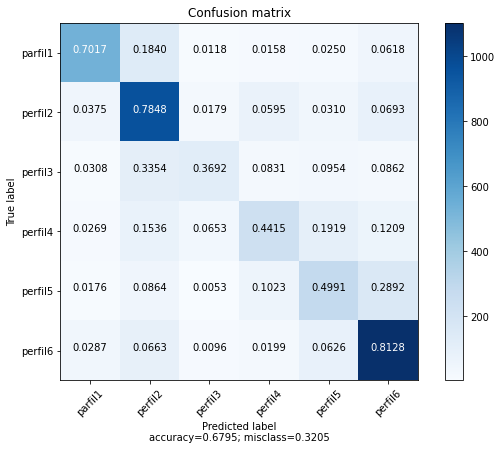

In [20]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [21]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv -O to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-05 02:54:17--  https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96291 (94K) [text/plain]
Saving to: ‘to_be_scored.csv’

100%[======================================>] 96,291      --.-K/s   in 0.005s  

2020-09-05 02:54:17 (18.4 MB/s) - ‘to_be_scored.csv’ saved [96291/96291]



,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [22]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          1000 non-null   int64 
 1   graduacao                   1000 non-null   object
 2   universidade                1000 non-null   object
 3   profissao                   1000 non-null   object
 4   organizacao                 1000 non-null   object
 5   pretende_fazer_cursos_lit   1000 non-null   int64 
 6   interesse_mba_lit           1000 non-null   int64 
 7   importante_ter_certificado  1000 non-null   int64 
 8   horas_semanais_estudo       1000 non-null   int64 
 9   como_conheceu_lit           1000 non-null   object
 10  total_modulos               1000 non-null   int64 
 11  modulos_iniciados           1000 non-null   int64 
 12  modulos_finalizados         1000 non-null   int64 
 13  certificados                1000 non-null   int64

In [23]:
y_pred = model.predict(df_to_be_scored)
df_to_be_scored['target'] = y_pred
df_to_be_scored.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,target
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1,perfil2
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0,perfil2
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0,perfil6
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0,perfil2
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [24]:
project.save_data(file_name="results.csv", data=df_to_be_scored.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio6lit-__removido__',
 'asset_id': '__removido__'}

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
